Files being analyzed:
2016 Image: Landsat8_SR_RGB_-54.78_-3.91_2016_08_16.tiff
2016 Target: Deforestation_-54.78_-3.91_2016_08_01.tiff
2021 Image: Landsat8_SR_RGB_-54.78_-3.91_2021_05_26.tiff
2021 Target: Deforestation_-54.78_-3.91_2021_05_01.tiff


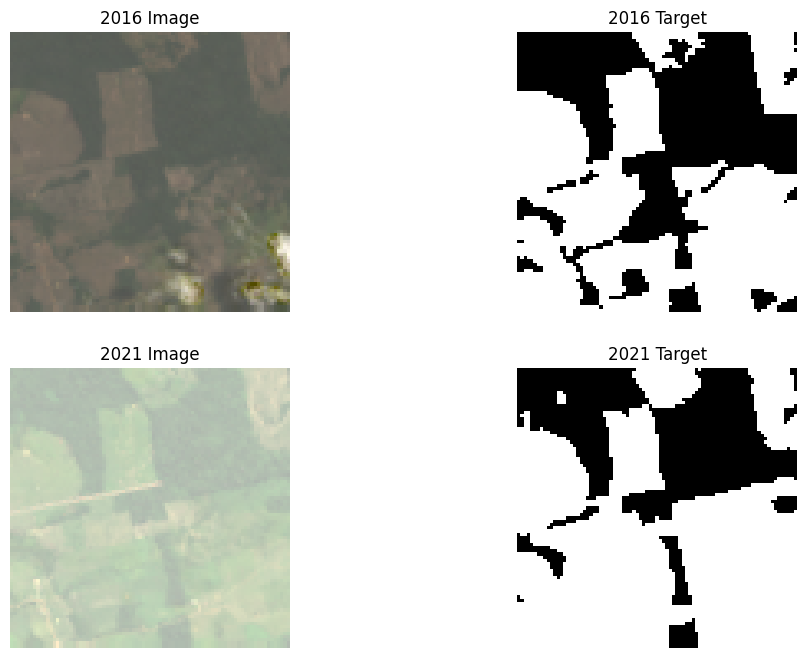

Forest area in 2016: 4183 pixels
Forest area in 2021: 4848 pixels
Deforested area: -665 pixels
Deforestation percentage: -15.90%


In [26]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Caminhos das pastas
IMAGES_2016_DIR = "../data/filtered/images_2016"
TARGETS_2016_DIR = "../data/filtered/targets_2016"
IMAGES_2021_DIR = "../data/filtered/images_2021"
TARGETS_2021_DIR = "../data/filtered/targets_2021"

# Obter listas de caminhos de arquivos
image_paths_2016 = sorted([os.path.join(IMAGES_2016_DIR, f) for f in os.listdir(IMAGES_2016_DIR) if f.endswith(".tiff")])
target_paths_2016 = sorted([os.path.join(TARGETS_2016_DIR, f) for f in os.listdir(TARGETS_2016_DIR) if f.endswith(".tiff")])
image_paths_2021 = sorted([os.path.join(IMAGES_2021_DIR, f) for f in os.listdir(IMAGES_2021_DIR) if f.endswith(".tiff")])
target_paths_2021 = sorted([os.path.join(TARGETS_2021_DIR, f) for f in os.listdir(TARGETS_2021_DIR) if f.endswith(".tiff")])

# Carregar e visualizar pares
index = 676  # Alterar manualmente ou usar o índice retornado pela função find_index_by_coordinates

# Carregamento dos pares de 2016 e 2021
image_2016_path = image_paths_2016[index]
target_2016_path = target_paths_2016[index]
image_2021_path = image_paths_2021[index]
target_2021_path = target_paths_2021[index]

print(f"Files being analyzed:")
print(f"2016 Image: {os.path.basename(image_2016_path)}")
print(f"2016 Target: {os.path.basename(target_2016_path)}")
print(f"2021 Image: {os.path.basename(image_2021_path)}")
print(f"2021 Target: {os.path.basename(target_2021_path)}")

# Carregar imagens
with Image.open(image_2016_path) as img_2016, \
     Image.open(target_2016_path) as tgt_2016, \
     Image.open(image_2021_path) as img_2021, \
     Image.open(target_2021_path) as tgt_2021:
    
    image_2016 = np.array(img_2016) / 255.0
    target_2016 = np.array(tgt_2016.convert('L'))
    image_2021 = np.array(img_2021) / 255.0
    target_2021 = np.array(tgt_2021.convert('L'))

# Visualizar imagens
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.title("2016 Image")
plt.imshow(image_2016)
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("2016 Target")
plt.imshow(target_2016, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("2021 Image")
plt.imshow(image_2021)
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("2021 Target")
plt.imshow(target_2021, cmap="gray")
plt.axis("off")

plt.show()

# Cálculo do desmatamento
def calculate_deforestation_area(target_2016, target_2021):
    forest_2016 = np.sum(target_2016 == 1)
    forest_2021 = np.sum(target_2021 == 1)
    deforested_area = forest_2016 - forest_2021
    deforestation_percentage = (deforested_area / forest_2016) * 100 if forest_2016 > 0 else 0

    return {
        "forest_2016": forest_2016,
        "forest_2021": forest_2021,
        "deforested_area": deforested_area,
        "deforestation_percentage": deforestation_percentage
    }

stats = calculate_deforestation_area(target_2016, target_2021)

# Exibir os dados de desmatamento
print(f"Forest area in 2016: {stats['forest_2016']} pixels")
print(f"Forest area in 2021: {stats['forest_2021']} pixels")
print(f"Deforested area: {stats['deforested_area']} pixels")
print(f"Deforestation percentage: {stats['deforestation_percentage']:.2f}%")

In [37]:
from typing import Tuple, Optional
import os

# Caminhos das pastas
BASE_DIR = "../data/filtered"
IMAGES_2016_DIR = os.path.join(BASE_DIR, "images_2016")
TARGETS_2016_DIR = os.path.join(BASE_DIR, "targets_2016")
IMAGES_2021_DIR = os.path.join(BASE_DIR, "images_2021")
TARGETS_2021_DIR = os.path.join(BASE_DIR, "targets_2021")

# Validar existência dos diretórios antes de prosseguir
def validate_directories(*dirs):
    for directory in dirs:
        if not os.path.exists(directory):
            raise FileNotFoundError(f"Directory not found: {directory}")

validate_directories(IMAGES_2016_DIR, TARGETS_2016_DIR, IMAGES_2021_DIR, TARGETS_2021_DIR)

# Obter listas de caminhos de arquivos
image_paths_2016 = sorted([os.path.join(IMAGES_2016_DIR, f) for f in os.listdir(IMAGES_2016_DIR) if f.endswith(".tiff")])
target_paths_2016 = sorted([os.path.join(TARGETS_2016_DIR, f) for f in os.listdir(TARGETS_2016_DIR) if f.endswith(".tiff")])
image_paths_2021 = sorted([os.path.join(IMAGES_2021_DIR, f) for f in os.listdir(IMAGES_2021_DIR) if f.endswith(".tiff")])
target_paths_2021 = sorted([os.path.join(TARGETS_2021_DIR, f) for f in os.listdir(TARGETS_2021_DIR) if f.endswith(".tiff")])

def find_index_and_files_by_coordinates(lat: float, lon: float) -> Tuple[Optional[int], Optional[str], Optional[str], Optional[str], Optional[str]]:
    """
    Find the index and file names of the image and target pairs corresponding to the given latitude and longitude.

    Args:
        lat (float): Latitude of the target image.
        lon (float): Longitude of the target image.

    Returns:
        Tuple[Optional[int], Optional[str], Optional[str], Optional[str], Optional[str]]:
            - Index of the image in 2016.
            - File name of the 2016 image.
            - File name of the 2016 target.
            - File name of the 2021 image.
            - File name of the 2021 target.
            Returns (None, None, None, None, None) if not found.
    """
    search_pattern = f"{lon:.2f}_{lat:.2f}"

    for index, path in enumerate(image_paths_2016):
        if search_pattern in path:
            try:
                image_2016_file = os.path.basename(path)
                target_2016_file = os.path.basename(target_paths_2016[index])
                image_2021_file = os.path.basename(image_paths_2021[index])
                target_2021_file = os.path.basename(target_paths_2021[index])
                return index, image_2016_file, target_2016_file, image_2021_file, target_2021_file
            except IndexError as e:
                raise IndexError(f"Index mismatch in file lists: {e}")

    return None, None, None, None, None

# Exemplo de uso
latitude = -4.17  # Alterar para a latitude desejada
longitude = -54.78  # Alterar para a longitude desejada

try:
    result = find_index_and_files_by_coordinates(latitude, longitude)
    if result[0] is not None:
        index, image_2016_file, target_2016_file, image_2021_file, target_2021_file = result
        print(f"Index for coordinates ({latitude}, {longitude}): {index}")
        print(f"2016 Image: {image_2016_file}")
        print(f"2016 Target: {target_2016_file}")
        print(f"2021 Image: {image_2021_file}")
        print(f"2021 Target: {target_2021_file}")
    else:
        print(f"No image found for coordinates ({latitude}, {longitude})")
except FileNotFoundError as e:
    print(f"Error: {e}")
except IndexError as e:
    print(f"Error in file indexing: {e}")

Index for coordinates (-4.17, -54.78): 689
2016 Image: Landsat8_SR_RGB_-54.78_-4.17_2016_08_16.tiff
2016 Target: Deforestation_-54.78_-4.17_2016_08_01.tiff
2021 Image: Landsat8_SR_RGB_-54.78_-4.17_2021_05_26.tiff
2021 Target: Deforestation_-54.78_-4.17_2021_05_01.tiff


Model loaded successfully!
Index for coordinates (-3.91, -54.78): 676
2016 Image: Landsat8_SR_RGB_-54.78_-3.91_2016_08_16.tiff
2016 Target: Deforestation_-54.78_-3.91_2016_08_01.tiff
2021 Image: Landsat8_SR_RGB_-54.78_-3.91_2021_05_26.tiff
2021 Target: Deforestation_-54.78_-3.91_2021_05_01.tiff
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


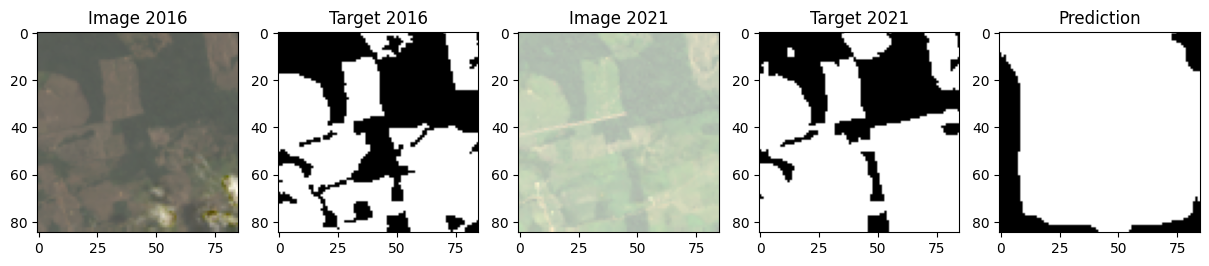

In [38]:
from typing import Tuple, Optional
import os
import numpy as np
from PIL import Image
import tensorflow as tf

# Caminhos das pastas
IMAGES_2016_DIR = "../data/filtered/images_2016"
TARGETS_2016_DIR = "../data/filtered/targets_2016"
IMAGES_2021_DIR = "../data/filtered/images_2021"
TARGETS_2021_DIR = "../data/filtered/targets_2021"
MODEL_PATH = "../trained_model.keras"

# Obter listas de caminhos de arquivos
image_paths_2016 = sorted([os.path.join(IMAGES_2016_DIR, f) for f in os.listdir(IMAGES_2016_DIR) if f.endswith(".tiff")])
target_paths_2016 = sorted([os.path.join(TARGETS_2016_DIR, f) for f in os.listdir(TARGETS_2016_DIR) if f.endswith(".tiff")])
image_paths_2021 = sorted([os.path.join(IMAGES_2021_DIR, f) for f in os.listdir(IMAGES_2021_DIR) if f.endswith(".tiff")])
target_paths_2021 = sorted([os.path.join(TARGETS_2021_DIR, f) for f in os.listdir(TARGETS_2021_DIR) if f.endswith(".tiff")])

def find_index_and_files_by_coordinates(lat: float, lon: float) -> Tuple[Optional[int], Optional[str], Optional[str], Optional[str], Optional[str]]:
    """
    Find the index and file names of the image and target pairs corresponding to the given latitude and longitude.

    Args:
        lat (float): Latitude of the target image.
        lon (float): Longitude of the target image.

    Returns:
        Tuple[Optional[int], Optional[str], Optional[str], Optional[str], Optional[str]]:
            - Index of the image in 2016.
            - File name of the 2016 image.
            - File name of the 2016 target.
            - File name of the 2021 image.
            - File name of the 2021 target.
            Returns (None, None, None, None, None) if not found.
    """
    search_pattern = f"{lon:.2f}_{lat:.2f}"
    for index, path in enumerate(image_paths_2016):
        if search_pattern in path:
            image_2016_file = os.path.basename(path)
            target_2016_file = os.path.basename(target_paths_2016[index])
            image_2021_file = os.path.basename(image_paths_2021[index])
            target_2021_file = os.path.basename(target_paths_2021[index])
            return index, image_2016_file, target_2016_file, image_2021_file, target_2021_file

    print(f"Debug: No files matched for search pattern '{search_pattern}'.")
    return None, None, None, None, None

# Carregar o modelo treinado
model = tf.keras.models.load_model(MODEL_PATH, compile=False)
print("Model loaded successfully!")

# Coordenadas de exemplo
latitude = -3.91
longitude = -54.78

# Encontre os arquivos correspondentes
result = find_index_and_files_by_coordinates(latitude, longitude)
if result[0] is not None:
    index, image_2016_file, target_2016_file, image_2021_file, target_2021_file = result
    print(f"Index for coordinates ({latitude}, {longitude}): {index}")
    print(f"2016 Image: {image_2016_file}")
    print(f"2016 Target: {target_2016_file}")
    print(f"2021 Image: {image_2021_file}")
    print(f"2021 Target: {target_2021_file}")

    # Carregar imagens e predições
    with Image.open(os.path.join(IMAGES_2016_DIR, image_2016_file)) as img:
        image_2016 = np.array(img) / 255.0
    with Image.open(os.path.join(TARGETS_2016_DIR, target_2016_file)) as lbl:
        target_2016 = np.array(lbl.convert('L'))
    with Image.open(os.path.join(IMAGES_2021_DIR, image_2021_file)) as img:
        image_2021 = np.array(img) / 255.0
    with Image.open(os.path.join(TARGETS_2021_DIR, target_2021_file)) as lbl:
        target_2021 = np.array(lbl.convert('L'))

    prediction = model.predict(np.expand_dims(image_2021, axis=0)).squeeze() > 0.5

    # Mostrar imagens
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 5, figsize=(15, 5))
    ax[0].imshow(image_2016)
    ax[0].set_title("Image 2016")
    ax[1].imshow(target_2016, cmap="gray")
    ax[1].set_title("Target 2016")
    ax[2].imshow(image_2021)
    ax[2].set_title("Image 2021")
    ax[3].imshow(target_2021, cmap="gray")
    ax[3].set_title("Target 2021")
    ax[4].imshow(prediction, cmap="gray")
    ax[4].set_title("Prediction")
    plt.show()
else:
    print(f"No matching files found for coordinates ({latitude}, {longitude}).")